# Radial Distribution Function Comparison

This script compares the radial distribution function g₁₂ between DNS data
and the model predictions from Ayala et al. (2008) for a range of particle radii.
It uses the function `get_g12_radial_distribution_ao2008` from the `particula`
library to compute g₁₂ values over a range of particle radii.
The script then plots these computed values against the DNS datasets
for visual comparison.

Reference: Figure 16 in Ayala et al. (2008).

Ayala, O., Rosa, B., & Wang, L. P. (2008). Effects of turbulence on the geometric collision rate of sedimenting droplets. Part 2. Theory and parameterization. New Journal of Physics, 10. https://doi.org/10.1088/1367-2630/10/7/07501

Usage:
- Run this script to generate and display the comparison graph.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import particula as par
from particula.dynamics.coagulation.turbulent_dns_kernel.g12_radial_distribution_ao2008 import (
    get_g12_radial_distribution_ao2008,
)


def g12_calc(particle_radius, turbulent_dissipation, reynolds_lambda):
    # Define constants and parameters
    temperature = 300  # Temperature in Kelvin
    particle_density = 1000  # Particle density in kg/m³
    fluid_density = 1.0  # Fluid (air) density in kg/m³

    # Basic fluid par.particles
    dynamic_viscosity = par.gas.get_dynamic_viscosity(temperature)
    kinematic_viscosity = par.gas.get_kinematic_viscosity(
        dynamic_viscosity=dynamic_viscosity, fluid_density=fluid_density
    )

    # Particle inertia and settling velocity
    particle_inertia_time = par.particles.get_particle_inertia_time(
        particle_radius=particle_radius,
        particle_density=particle_density,
        fluid_density=fluid_density,
        kinematic_viscosity=kinematic_viscosity,
    )

    # Kolmogorov parameters
    kolmogorov_time = par.gas.get_kolmogorov_time(
        kinematic_viscosity=kinematic_viscosity,
        turbulent_dissipation=turbulent_dissipation,
    )
    kolmogorov_length_scale = par.gas.get_kolmogorov_length(
        kinematic_viscosity=kinematic_viscosity,
        turbulent_dissipation=turbulent_dissipation,
    )
    normalized_accel_variance = (
        par.gas.get_normalized_accel_variance_ao2008(
            re_lambda=reynolds_lambda
        )
    )
    kolmogorov_velocity = par.gas.get_kolmogorov_velocity(
        kinematic_viscosity=kinematic_viscosity,
        turbulent_dissipation=turbulent_dissipation,
    )

    stokes_number = par.particles.get_stokes_number(
        particle_inertia_time=particle_inertia_time,
        kolmogorov_time=kolmogorov_time,
    )

    # Compute g₁₂ Values
    g12_values = get_g12_radial_distribution_ao2008(
        particle_radius,
        stokes_number,
        kolmogorov_length_scale,
        reynolds_lambda,
        normalized_accel_variance,
        kolmogorov_velocity,
        kolmogorov_time,
    )

    return g12_values

## DNS Datasets

We have the following DNS datasets for the radial distribution function g₁₂:
- **Case 1**: R_λ = 23, ε = 100 cm²/s³
- **Case 2**: R_λ = 23, ε = 400 cm²/s³
- **Case 3**: R_λ = 72.4, ε = 100 cm²/s³
- **Case 4**: R_λ = 72.4, ε = 400 cm²/s³

DNS datasets for radial distribution function are from Ayala et al. (2008).

In [7]:
# Case R_lambda = 23, turbulent_dissipation = 100 cm2/s3
r23_e100 = np.array(
    [
        [9.937578027, 1.532846715],
        [19.98751561, 1.094890511],
        [29.91260924, 2.299270073],
        [40.02496879, 3.686131387],
        [49.95006242, 2.919708029],
        [60, 2.737226277],
    ]
)


# case: R_lambda = 23, turbulent_dissipation = 400 cm2 s−3
# r23_e400: 6 rows, 2 columns (X, Y)
r23_e400 = np.array(
    [
        [10.18726592, 1.094890511],
        [20.17478152, 3.248175182],
        [30.09987516, 8.175182482],
        [40.14981273, 8.686131387],
        [50.13732834, 7.226277372],
        [60.24968789, 5.620437956],
    ]
)

# case: R_lambda = 72.4, turbulent_dissipation = 100 cm2 s−3
# r72.4_e100: 6 rows, 2 columns (X, Y)
r72_4_e100 = np.array(
    [
        [10.12484395, 1.204379562],
        [19.92509363, 1.788321168],
        [29.97503121, 3.211678832],
        [40.08739076, 7.919708029],
        [50.01248439, 10.76642336],
        [59.93757803, 9.525547445],
    ]
)

# case: R_lambda = 72.4, turbulent_dissipation = 400 cm2 s−3
# r72.4_e400: 6 rows, 2 columns (X, Y)
r72_4_e400 = np.array(
    [
        [10, 0.875912409],
        [20.11235955, 5.145985401],
        [30.03745318, 16.82481752],
        [40.08739076, 15.72992701],
        [50.01248439, 14.48905109],
        [60, 13.72262774],
    ]
)

## Define Particle Radii and Parameters
We define the particle radii range and other necessary parameters for the calculations.
- **Particle Radii**: Ranging from 1 µm to 60 µm.
- **Turbulent Dissipation Rates**: 100 cm²/s³ and 400 cm²/s³ converted to m²/s³.
- **Reynolds Lambda Numbers**: 23 and 72.4.

In [8]:
particle_radius = np.linspace(1e-6, 60e-6, 100)  # From 1 µm to 60 µm

# Convert turbulent dissipation from cm²/s³ to m²/s³
turbulent_dissipation_100 = 100 * par.util.get_unit_conversion("cm^2/s^3", "m^2/s^3")
turbulent_dissipation_400 = 400 * par.util.get_unit_conversion("cm^2/s^3", "m^2/s^3")

## Compute g₁₂ Values for Each Case
Using the `g12_calc` function, we compute the radial distribution function for each case:
- **Case 1**: R_λ = 23, ε = 100 cm²/s³
- **Case 2**: R_λ = 23, ε = 400 cm²/s³
- **Case 3**: R_λ = 72.4, ε = 100 cm²/s³
- **Case 4**: R_λ = 72.4, ε = 400 cm²/s³

In [9]:
g12_values_re23_e100 = g12_calc(
    particle_radius, turbulent_dissipation_100, reynolds_lambda=23
)
g12_values_re23_e400 = g12_calc(
    particle_radius, turbulent_dissipation_400, reynolds_lambda=23
)
g12_values_re72_4_e100 = g12_calc(
    particle_radius, turbulent_dissipation_100, reynolds_lambda=72.4
)
g12_values_re72_4_e400 = g12_calc(
    particle_radius, turbulent_dissipation_400, reynolds_lambda=72.4
)

## Plot the Comparison Graph

We plot the DNS data and their corresponding model predictions on the same graph for easy comparison.
- Each DNS dataset and its model prediction are plotted sequentially with the same color.
- The legend entries follow the order of DNS data and model prediction for each case.

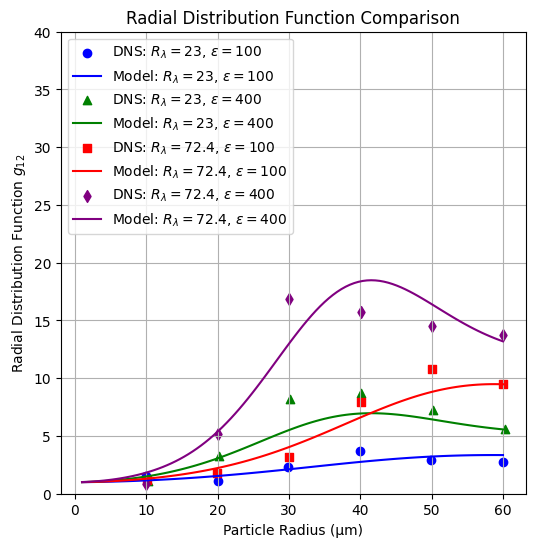

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

# case 1: R_lambda = 23, epsilon = 100
ax.scatter(
    r23_e100[:, 0],
    r23_e100[:, 1],
    label=r"DNS: $R_\lambda=23$, $\varepsilon=100$",
    color="blue",
    marker="o",
)
ax.plot(
    particle_radius * 1e6,
    np.diagonal(g12_values_re23_e100),
    label=r"Model: $R_\lambda=23$, $\varepsilon=100$",
    color="blue",
)

# Case 2: R_lambda = 23, epsilon = 400
ax.scatter(
    r23_e400[:, 0],
    r23_e400[:, 1],
    label=r"DNS: $R_\lambda=23$, $\varepsilon=400$",
    color="green",
    marker="^",
)
ax.plot(
    particle_radius * 1e6,
    np.diagonal(g12_values_re23_e400),
    label=r"Model: $R_\lambda=23$, $\varepsilon=400$",
    color="green",
)

# Case 3: R_lambda = 72.4, epsilon = 100
ax.scatter(
    r72_4_e100[:, 0],
    r72_4_e100[:, 1],
    label=r"DNS: $R_\lambda=72.4$, $\varepsilon=100$",
    color="red",
    marker="s",
)
ax.plot(
    particle_radius * 1e6,
    np.diagonal(g12_values_re72_4_e100),
    label=r"Model: $R_\lambda=72.4$, $\varepsilon=100$",
    color="red",
)

# Case 4: R_lambda = 72.4, epsilon = 400
ax.scatter(
    r72_4_e400[:, 0],
    r72_4_e400[:, 1],
    label=r"DNS: $R_\lambda=72.4$, $\varepsilon=400$",
    color="purple",
    marker="d",
)
ax.plot(
    particle_radius * 1e6,
    np.diagonal(g12_values_re72_4_e400),
    label=r"Model: $R_\lambda=72.4$, $\varepsilon=400$",
    color="purple",
)

# Set labels, title, legend, etc.
ax.set_xlabel("Particle Radius (µm)")
ax.set_ylabel("Radial Distribution Function $g_{12}$")
ax.set_title("Radial Distribution Function Comparison")
ax.legend(loc="upper left")
ax.grid(True)
ax.set_ylim(0, 40)
plt.show()

## Summary

Overall the comparison is good, and the curves are visually similar to Figure 16 in Ayala et al. (2008).